In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import numpy as np
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

### Data Loading

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/rms_mel.csv')
df.head()

,genre,file_name,rms_mean,rms_var,chroma_stft_mean,chroma_stft_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth,spectral_bandwidth.1,...,mel_spec11,mel_spec12,mel_spec13,mel_spec14,mel_spec15,mel_spec16,mel_spec17,mel_spec18,mel_spec19,mel_spec20
0,blues,blues.00000.wav,0.127820,0.003445,0.409089,0.089115,1727.351474,142000.224759,1965.724086,91115.763237,...,-11.619318,-13.248830,-15.205503,-17.721975,-21.459818,-23.451105,-25.575070,-26.389164,-29.996510,-38.826023
1,blues,blues.00001.wav,0.093903,0.002756,0.438725,0.092898,1450.864079,378294.241015,1972.260927,228136.751110,...,-23.548323,-24.655277,-26.339476,-28.471700,-33.291893,-33.236996,-32.744590,-32.470802,-35.806477,-44.577250
2,blues,blues.00002.wav,0.173220,0.003548,0.420921,0.084918,1493.930518,175858.135048,1698.946080,94216.071611,...,-9.212287,-13.057380,-16.085901,-16.665873,-19.833254,-22.363142,-24.911274,-27.586584,-31.426540,-40.359447
3,blues,blues.00003.wav,0.138990,0.006927,0.547953,0.071065,996.820708,183117.456205,1524.151953,177087.696285,...,-23.135990,-25.736160,-29.430140,-30.392696,-32.626990,-35.162300,-36.888172,-38.613697,-41.235264,-48.588070
4,blues,blues.00004.wav,0.089781,0.002618,0.334440,0.087125,1749.111185,359184.325599,1699.714246,105136.447967,...,-16.692339,-18.763874,-21.235283,-20.536680,-22.504978,-25.444075,-28.113205,-32.240480,-38.584164,-48.707350


### Data Preprocessing

In [4]:
df.shape

(1200, 43)

In [5]:
# map genre to int values
genre_labels=df.genre.unique()
genre_dict = dict(zip(genre_labels, range(len(genre_labels))))
df.genre=df.genre.map(genre_dict)
df

,genre,file_name,rms_mean,rms_var,chroma_stft_mean,chroma_stft_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth,spectral_bandwidth.1,...,mel_spec11,mel_spec12,mel_spec13,mel_spec14,mel_spec15,mel_spec16,mel_spec17,mel_spec18,mel_spec19,mel_spec20
0,0,blues.00000.wav,0.127820,0.003445,0.409089,0.089115,1727.351474,142000.224759,1965.724086,91115.763237,...,-11.619318,-13.248830,-15.205503,-17.721975,-21.459818,-23.451105,-25.575070,-26.389164,-29.996510,-38.826023
1,0,blues.00001.wav,0.093903,0.002756,0.438725,0.092898,1450.864079,378294.241015,1972.260927,228136.751110,...,-23.548323,-24.655277,-26.339476,-28.471700,-33.291893,-33.236996,-32.744590,-32.470802,-35.806477,-44.577250
2,0,blues.00002.wav,0.173220,0.003548,0.420921,0.084918,1493.930518,175858.135048,1698.946080,94216.071611,...,-9.212287,-13.057380,-16.085901,-16.665873,-19.833254,-22.363142,-24.911274,-27.586584,-31.426540,-40.359447
3,0,blues.00003.wav,0.138990,0.006927,0.547953,0.071065,996.820708,183117.456205,1524.151953,177087.696285,...,-23.135990,-25.736160,-29.430140,-30.392696,-32.626990,-35.162300,-36.888172,-38.613697,-41.235264,-48.588070
4,0,blues.00004.wav,0.089781,0.002618,0.334440,0.087125,1749.111185,359184.325599,1699.714246,105136.447967,...,-16.692339,-18.763874,-21.235283,-20.536680,-22.504978,-25.444075,-28.113205,-32.240480,-38.584164,-48.707350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,11,rock.00095.wav,0.079147,0.000395,0.451571,0.073594,1892.933025,291285.568540,2049.121328,104547.942658,...,-14.921132,-14.130657,-15.188020,-18.477924,-21.123915,-25.875294,-27.437235,-29.186508,-31.607060,-40.407710
1196,11,rock.00096.wav,0.076000,0.000656,0.504338,0.066288,1920.394382,188219.507592,2020.888552,91559.970270,...,-13.106709,-12.418111,-15.932714,-20.049890,-21.466902,-25.008043,-27.465754,-28.046460,-31.713278,-40.334846
1197,11,rock.00097.wav,0.081143,0.000399,0.500144,0.068688,2016.695292,234634.677236,1899.241053,78277.999645,...,-10.310806,-10.224064,-12.311652,-16.118890,-17.036240,-22.465780,-25.731897,-28.891651,-32.660553,-39.990870
1198,11,rock.00098.wav,0.083426,0.001275,0.498808,0.082386,1314.906896,245576.541732,1750.534091,119777.645071,...,-20.962389,-21.496973,-24.258274,-27.915857,-29.797253,-34.093180,-36.866890,-37.527027,-40.313090,-48.901535


In [6]:
df['genre'].value_counts()

7     101
0     100
1     100
2     100
3     100
4     100
5     100
8     100
9     100
10    100
11    100
6      99
Name: genre, dtype: int64

In [7]:
X = df.drop(['genre','file_name'], axis=1)

y = df['genre']

### Data Splitting

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [11]:
X_train.shape, X_test.shape

((804, 41), (396, 41))

### Simple Random Forest

In [8]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred,average='micro'))
  print("Recall: ",recall_score(y_test,y_pred,average='micro'))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

In [12]:
rfc = RandomForestClassifier(random_state=0)
train_predict_evaluate(rfc,X_train,y_train,X_test)

Accuracy:  0.6666666666666666
Precision:  0.6666666666666666
Recall:  0.6666666666666666
Confusion Matrix:
 [[27  0  1  1  2  0  2  0  0  0  1  1]
 [ 0 28  0  0  0  0  0  0  0  0  0  0]
 [ 2  1 17  3  0  0  2  0  1  0  2  9]
 [ 0  0  1 16  0  4  0  0  1  2  7  6]
 [ 0  0  0  0 25  1  0  5  0  0  1  0]
 [ 0  0  0  3  2 14  1  0  1  0  9  2]
 [ 0  4  1  0  0  0 24  0  0  1  0  1]
 [ 0  0  0  0  4  0  1 28  0  0  0  0]
 [ 0  0  0  0  0  1  3  0 29  0  0  3]
 [ 0  0  1  3  0  3  0  2  0 20  0  4]
 [ 0  0  1  1  1  2  1  0  0  1 22  1]
 [ 1  0  1  5  1  0  3  0  3  0  4 14]]


In [14]:
import pickle
fileName="/content/drive/MyDrive/Colab Notebooks/Data/ML_savedModels/RandomForest_Basic.pkl"
pickle.dump(rfc,open(fileName, "wb"))

In [16]:
param_range = np.arange(1, 150, 2)
train_scores, valid_scores = validation_curve(rfc, X_train, y_train,param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1)

In [17]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)


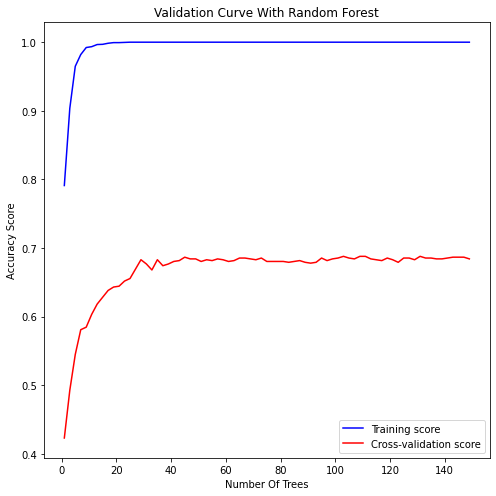

In [18]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### Hyperparameter Tuning

#### Randomized Search CV

In [ ]:
# Taking a huge range of values to get nearer to optimal parameters

# Parameters to check
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 150, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Creating random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Using the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)

In [ ]:
# Training model and printing results
train_predict_evaluate (rfc_random, X_train, y_train, X_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Accuracy:  0.6742424242424242
Precision:  0.6742424242424242
Recall:  0.6742424242424242
Confusion Matrix:
 [[27  0  0  1  2  0  2  0  1  0  1  1]
 [ 0 28  0  0  0  0  0  0  0  0  0  0]
 [ 3  1 18  3  0  0  1  0  0  0  2  9]
 [ 0  0  0 14  0  5  0  0  1  2  7  8]
 [ 0  0  0  0 27  0  0  5  0  0  0  0]
 [ 1  0  0  5  1 13  0  0  1  0 10  1]
 [ 1  3  2  0  0  0 23  0  1  0  0  1]
 [ 0  0  0  0  4  0  1 28  0  0  0  0]
 [ 1  0  0  0  2  1  2  0 28  0  0  2]
 [ 0  0  0  3  0  1  0  2  0 20  2  5]
 [ 0  0  1  1  0  1  1  0  0  1 25  0]
 [ 1  0  0  3  1  1  4  0  1  1  4 16]]


In [ ]:
rfc_random.best_params_

{'bootstrap': False,
 'max_depth': 150,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

#### Grid Search CV

In [19]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [145, 150, 155, 160],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [9, 10, 11],
    'n_estimators': [225, 250,275,300,325,350]
}


In [20]:
#Grid Search model
grid_search_model = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Results on the Grid Search model
train_predict_evaluate (grid_search_model, X_train, y_train, X_test)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Accuracy:  0.6767676767676768
Precision:  0.6767676767676768
Recall:  0.6767676767676768
Confusion Matrix:
 [[28  0  0  1  1  0  2  0  1  0  1  1]
 [ 0 28  0  0  0  0  0  0  0  0  0  0]
 [ 2  1 19  3  0  0  2  0  1  0  2  7]
 [ 0  0  0 17  0  4  0  0  1  2  6  7]
 [ 0  0  0  0 26  0  0  4  1  0  1  0]
 [ 0  0  0  4  0 15  1  0  1  0 10  1]
 [ 1  4  1  0  0  0 22  0  0  0  0  3]
 [ 0  0  0  0  4  0  1 27  0  1  0  0]
 [ 0  0  0  0  1  1  3  0 31  0  0  0]
 [ 0  0  0  3  0  2  1  1  0 20  1  5]
 [ 0  0  1  0  1  1  1  0  0  1 24  1]
 [ 1  0  2  5  1  0  4  0  3  0  5 11]]


In [21]:
grid_search_model.best_params_

{'bootstrap': True,
 'max_depth': 145,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'n_estimators': 275}

### Final Model

In [22]:
final_model=RandomForestClassifier(n_estimators=275,min_samples_split=9,min_samples_leaf=3,max_depth=145,bootstrap=True)
# Results on the Grid Search model
train_predict_evaluate (grid_search_model, X_train, y_train, X_test)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Accuracy:  0.6767676767676768
Precision:  0.6767676767676768
Recall:  0.6767676767676768
Confusion Matrix:
 [[28  0  0  1  1  0  2  0  1  0  1  1]
 [ 0 28  0  0  0  0  0  0  0  0  0  0]
 [ 2  1 19  3  0  0  2  0  1  0  2  7]
 [ 0  0  0 17  0  4  0  0  1  2  6  7]
 [ 0  0  0  0 26  0  0  4  1  0  1  0]
 [ 0  0  0  4  0 15  1  0  1  0 10  1]
 [ 1  4  1  0  0  0 22  0  0  0  0  3]
 [ 0  0  0  0  4  0  1 27  0  1  0  0]
 [ 0  0  0  0  1  1  3  0 31  0  0  0]
 [ 0  0  0  3  0  2  1  1  0 20  1  5]
 [ 0  0  1  0  1  1  1  0  0  1 24  1]
 [ 1  0  2  5  1  0  4  0  3  0  5 11]]


In [23]:
import pickle
fileName="/content/drive/MyDrive/Colab Notebooks/Data/ML_savedModels/RandomForest_Parameter_Tuned.pkl"
pickle.dump(rfc,open(fileName, "wb"))

In [24]:
param_range = np.arange(1, 150, 2)
train_scores, valid_scores = validation_curve(final_model, X_train, y_train,param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="accuracy", 
                                             n_jobs=-1,
                                              verbose=True
                                              )

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:  1.4min finished


In [25]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)


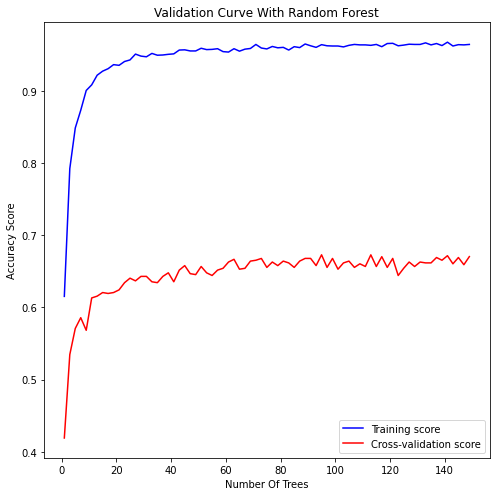

In [26]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### K-Fold

In [27]:
X.shape,y.shape

((1200, 41), (1200,))

#### Basic Model

In [28]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)

def get_precision(training_data,training_target_col):
  precision=[]
  for i,j in kf.split(training_data):
    X=training_data.iloc[i]
    X_label=training_target_col.iloc[i]
    X_val=training_data.iloc[j]
    X_val_label=training_target_col.iloc[j]

    temp_model=RandomForestClassifier(random_state=0)
    temp_model.fit(X,X_label)

    x_val_predict=temp_model.predict(X_val)

    val=precision_score(X_val_label,x_val_predict,average='micro')

    precision.append(val)
  
  return precision

def get_recall(training_data,training_target_col):
  recall=[]
  for i,j in kf.split(training_data):
    X=training_data.iloc[i]
    X_label=training_target_col.iloc[i]
    X_val=training_data.iloc[j]
    X_val_label=training_target_col.iloc[j]

    temp_model=RandomForestClassifier(random_state=0)
    temp_model.fit(X,X_label)

    x_val_predict=temp_model.predict(X_val)

    val=recall_score(X_val_label,x_val_predict,average='micro')

    recall.append(val)
  
  return recall



In [29]:
def cross_validation_score(model,X,y):
  accuracy=cross_val_score(model, X, y, cv =5,scoring='accuracy')
  recall=get_recall(X, y)
  precision=get_precision(X,y)

  print("Accuracy: ", np.mean(accuracy))
  print("Precision: ", np.mean(precision))
  print("Recall: ", np.mean(recall))

In [31]:
fileName1="/content/drive/MyDrive/Colab Notebooks/Data/ML_savedModels/RandomForest_Basic.pkl"
rfc=pickle.load(open(fileName1, "rb"))

In [32]:
# On model without Hyperparameter Tuning
cross_validation_score(rfc, X, y)

Accuracy:  0.5800000000000001
Precision:  0.7033333333333334
Recall:  0.7033333333333334


#### Parameter tuned model

In [33]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)

def get_precision(training_data,training_target_col):
  precision=[]
  for i,j in kf.split(training_data):
    X=training_data.iloc[i]
    X_label=training_target_col.iloc[i]
    X_val=training_data.iloc[j]
    X_val_label=training_target_col.iloc[j]

    temp_model=RandomForestClassifier(n_estimators=275,min_samples_split=9,min_samples_leaf=3,max_depth=145,bootstrap=True)
    temp_model.fit(X,X_label)

    x_val_predict=temp_model.predict(X_val)

    val=precision_score(X_val_label,x_val_predict,average='micro')

    precision.append(val)
  
  return precision

def get_recall(training_data,training_target_col):
  recall=[]
  for i,j in kf.split(training_data):
    X=training_data.iloc[i]
    X_label=training_target_col.iloc[i]
    X_val=training_data.iloc[j]
    X_val_label=training_target_col.iloc[j]

    temp_model=RandomForestClassifier(n_estimators=275,min_samples_split=9,min_samples_leaf=3,max_depth=145,bootstrap=True)
    temp_model.fit(X,X_label)

    x_val_predict=temp_model.predict(X_val)

    val=recall_score(X_val_label,x_val_predict,average='micro')

    recall.append(val)
  
  return recall



In [34]:
def cross_validation_score(model,X,y):
  accuracy=cross_val_score(model, X, y, cv =5,scoring='accuracy')
  recall=get_recall(X, y)
  precision=get_precision(X,y)

  print("Accuracy: ", np.mean(accuracy))
  print("Precision: ", np.mean(precision))
  print("Recall: ", np.mean(recall))

In [35]:
fileName1="/content/drive/MyDrive/Colab Notebooks/Data/ML_savedModels/RandomForest_Parameter_Tuned.pkl"
rfc=pickle.load(open(fileName1, "rb"))

In [36]:
# On model without Hyperparameter Tuning
cross_validation_score(rfc, X, y)

Accuracy:  0.5800000000000001
Precision:  0.6799999999999999
Recall:  0.6733333333333332
